<div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em"><font color="#475AFF">Corrélation entre l'âge des clients et la fréquence d’achat</font>
</h1>
</div>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_rows', None)

In [2]:
data_paniers = pd.read_csv("./DATA/cleaned/data_paniers.csv")
data_paniers.head()

,session_id,montant_dupanier,nombre_article,client_id,age,birth,sex,month,day,date
0,s_1,11.99,1,c_329,55.0,1967.0,f,2021-03,2021-03-01,2021-03-01 00:01:07.843138
1,s_10,26.99,1,c_2218,52.0,1970.0,f,2021-03,2021-03-01,2021-03-01 00:10:33.163037
2,s_100,33.72,2,c_3854,44.0,1978.0,f,2021-03,2021-03-01,2021-03-01 04:12:43.572994
3,s_1000,39.22,4,c_1014,33.0,1989.0,m,2021-03,2021-03-03,2021-03-03 02:38:09.568389
4,s_10000,41.49,3,c_476,33.0,1989.0,f,2021-03,2021-03-22,2021-03-22 17:46:05.819130


In [3]:
E = data_paniers.groupby(['month','age'])['client_id'].value_counts()
E= pd.DataFrame(E)
E.columns = ['frequence_d_achat_par_mois']
E = E.reset_index()
E_copy = E.copy()
E.head()

,month,age,client_id,frequence_d_achat_par_mois
0,2021-03,18.0,c_1590,5
1,2021-03,18.0,c_2627,4
2,2021-03,18.0,c_4104,4
3,2021-03,18.0,c_6275,4
4,2021-03,18.0,c_6976,4


### HYPOTHESE DE NORMALITE

### Normalite de la distribution des Ages

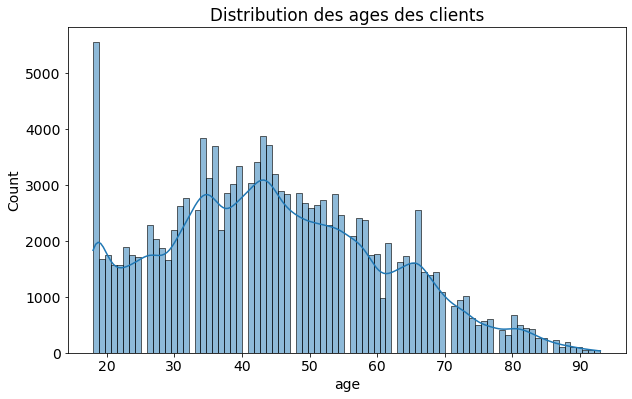

In [4]:

fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.histplot(E['age'],kde=True)
plt.title("Distribution des ages des clients")
plt.show()
fig.savefig('./GRAPHIQUES/correlation_age_frequenceAchat/Distribution des ages-frequenceAchat.png',dpi=fig.dpi*10)
plt.close(fig)

In [5]:
E['age'].describe()

count    137127.000000
mean         44.941004
std          16.189444
min          18.000000
25%          33.000000
50%          44.000000
75%          56.000000
max          93.000000
Name: age, dtype: float64

In [6]:
# shapiro-wilk test
# H0 : la distribution des ages suit une distribution normale
# H1 : la distribution des ages ne suit pas une distribution normale
res_shap=st.shapiro(E['age'])
print('statistic=%.3f, pvalue=%.3f' % (res_shap.statistic, res_shap.pvalue))

statistic=0.980, pvalue=0.000


C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des ages ne suit donc pas une distribution normale .

In [7]:
# kolmogorov-smirnov
# H0 : la distribution des ages suit une distribution normale
# H1 : la distribution des ages ne suit pas une distribution normale
rng = np.random.default_rng()
sample2 = st.norm.rvs(size=342, random_state=rng)
res = st.ks_2samp(E['age'], sample2,alternative='two-sided')
print('statistic=%.3f, pvalue=%.3f' % (res.statistic, res.pvalue))

statistic=1.000, pvalue=0.000


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des ages ne suit donc pas une distribution normale .

### Normalite de la distribution des frequences d'achat

In [8]:
E['frequence_d_achat_par_mois'].describe()

count    137127.000000
mean          2.496336
std           7.427524
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         536.000000
Name: frequence_d_achat_par_mois, dtype: float64

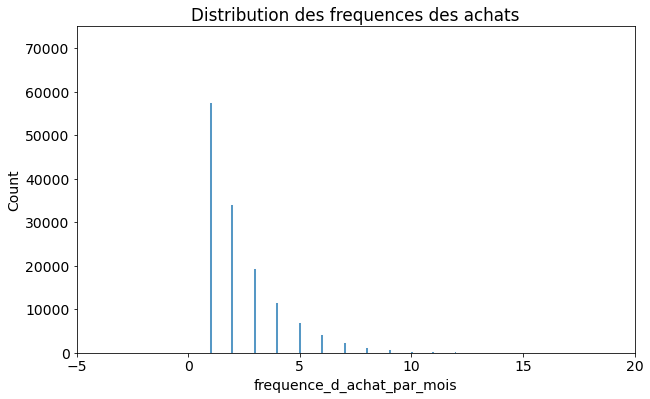

In [9]:
fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.histplot(E['frequence_d_achat_par_mois'])
plt.xlim(-5, 20)
plt.ylim(0, 75000)
plt.title("Distribution des frequences des achats")
plt.show()
fig.savefig('./GRAPHIQUES/correlation_age_frequenceAchat/Distribution des frequence des chat.png',dpi=fig.dpi*10)
plt.close(fig)

In [10]:
# shapiro-wilk test
# H0 : la distribution des montants de paniers suit une distribution normale
# H1 : la distribution des montants de paniers ne suit pas une distribution normale
res_shap=st.shapiro(E['frequence_d_achat_par_mois'])
print('statistic=%.3f, pvalue=%.3f' % (res_shap.statistic, res_shap.pvalue))

statistic=0.077, pvalue=0.000


C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des frequences d'achat ne suit donc pas une distribution normale .

In [11]:
# kolmogorov-smirnov
# H0 : la distribution des ages suit une distribution normale
# H1 : la distribution des ages ne suit pas une distribution normale
rng = np.random.default_rng()
sample2 = st.norm.rvs(size=342, random_state=rng)
res = st.ks_2samp(E['frequence_d_achat_par_mois'], sample2,alternative='two-sided')
print('statistic=%.3f, pvalue=%.3f' % (res.statistic, res.pvalue))

statistic=0.871, pvalue=0.000


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des frequences d'achat ne suit donc pas une distribution normale .

### TEST DE SPEARMAN

In [12]:
# Spearmanr correlation test
# H0 : les variables sont independantes
# H1 : les variables sont dependantes
res_spearman =st.spearmanr(E['age'],E['frequence_d_achat_par_mois'])
print('statistic=%.3f,pvalue=%.3f' % (res_spearman.correlation, res_spearman.pvalue))



statistic=0.120,pvalue=0.000


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% .
On conclue donc que l'Âge des clients et la fréquence d’achat sont 
##### dependantes .

In [13]:
slope, intercept, r_value, p_value, std_err = st.linregress(E['age'],
                                                            E['frequence_d_achat_par_mois'])
fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})

sns.scatterplot(data=E, x='age', y='frequence_d_achat_par_mois')

plt.ylabel('Frequence des achats')

plt.xlabel('Age')

plt.grid()

plt.xlim(15, 100)
plt.ylim(0, 20)

plt.legend(bbox_to_anchor=(1, 1.02))

plt.title("Nuage de points age de client/ frequence des achats par mois")
fitLine = slope * E['age'] + intercept

plt.plot(E['age'], fitLine, c='r')
fig.savefig('./GRAPHIQUES/correlation_age_frequenceAchat/Nuage_de_point_age_freaquenceachat',dpi=fig.dpi*10)
plt.close(fig)

No handles with labels found to put in legend.


### MERCI DE VOTRE ATTENTION